# Q6

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# from scipy.signal import convolve2d

ModuleNotFoundError: No module named 'google'

## part a

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [ ]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''
  pad_h = filter_size // 2
  pad_w = filter_size // 2
  
  image = np.pad(img, ((pad_h , pad_h), (pad_w , pad_w)), mode='reflect')
  return image

In [ ]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  
  
  pad_height = filter_size // 2
  pad_width = filter_size // 2

  image_height, image_width = img.shape

  k=0
  m=0
  for i in range(pad_height, image_height + pad_height):
    m=0 
    for j in range(pad_width, image_width + pad_width): 
      window = image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
      result[k, m] = np.sum(window) // filter_size * filter_size
      m+=1
    k+=1
  
  
  return result

In [ ]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  pad_height = filter_size // 2
  pad_width = filter_size // 2
  
  image_height, image_width = img.shape
    
  k=0
  m=0
  for i in range(pad_height, image_height + pad_height):
    m=0
    for j in range(pad_width, image_width + pad_width): 
      median_filter = image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
      result[k, m] = np.median(median_filter)
      m +=1
    k+=1
  
  return result

In [ ]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * std ** 2))

    kernel /= np.sum(kernel)

    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

In [ ]:
# Do not change this cell
image = cv2.imread('taj.jpg',cv2.IMREAD_GRAYSCALE)

(-0.5, 299.5, 299.5, -0.5)

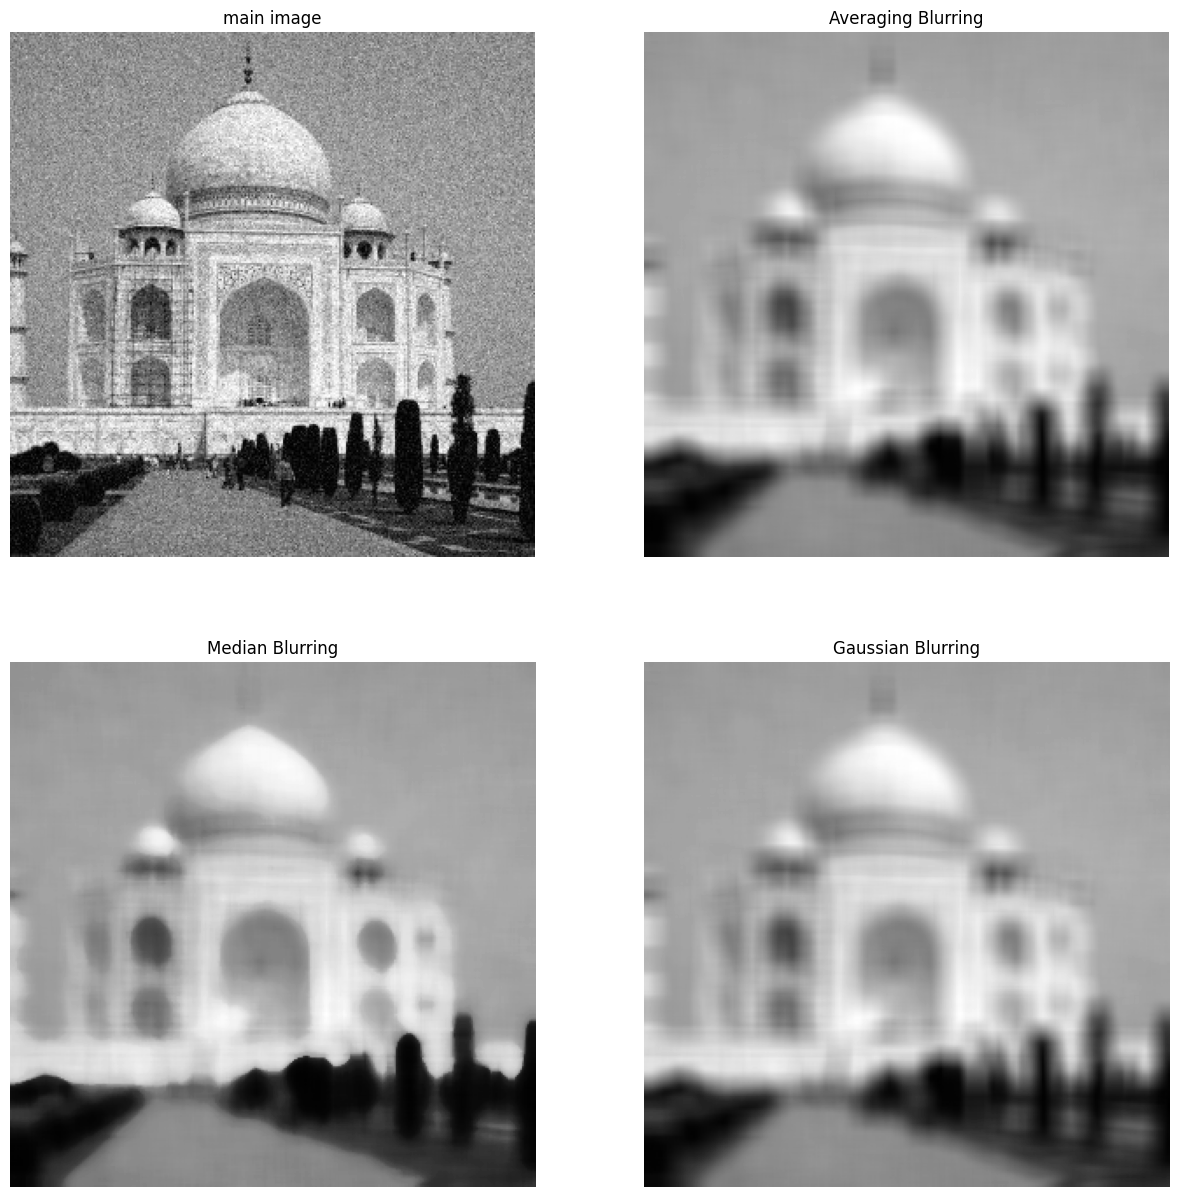

In [ ]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part b

<h3> in this section we want to implement Bilateral Filtering </h3>
<h3> first you need to read about it and write about it in your report </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [ ]:
def Bilateral_Filtering(img, filter_size, std, rstd):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): value of std in the coordinate space
      rstd (float): value of std in the color space
    output(s):
      result (ndarray): computed Bilateral blurring
    '''
    result = img.copy()
    # image = Reflect101(img, filter_size)
    # kernel = np.zeros((filter_size,filter_size))

    # pad_height = filter_size // 2
    # pad_width = filter_size // 2  
    
    # image_height, image_width = img.shape
    
    # k=0
    # m=0
    # for i in range(pad_height, image_height + pad_height):
    #   m=0
    #   for j in range(pad_width, image_width + pad_width): 
    #     median_filter = image[i - pad_height : i + pad_height + 1 , j - pad_width : j + pad_width + 1] 
    #     result[k, m] = np.median(median_filter)
    #     m +=1
    #   k+=1

    return result

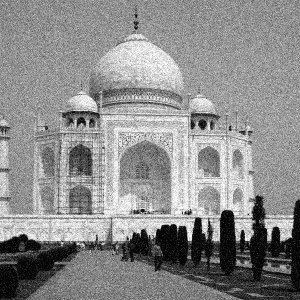

In [ ]:
# Do not change this cell
bilateral = Bilateral_Filtering(image, 15, 40, 40)
cv2_imshow(bilateral)

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [ ]:
AveragingBlurring = cv2.blur(image , (15,15))
MedianBlurring = cv2.medianBlur(image, 15)
GaussianBlurring = cv2.GaussianBlur(image , (15,15) , 40)
Bilateral = cv2.bilateralFilter(image , 15 ,40 ,40)

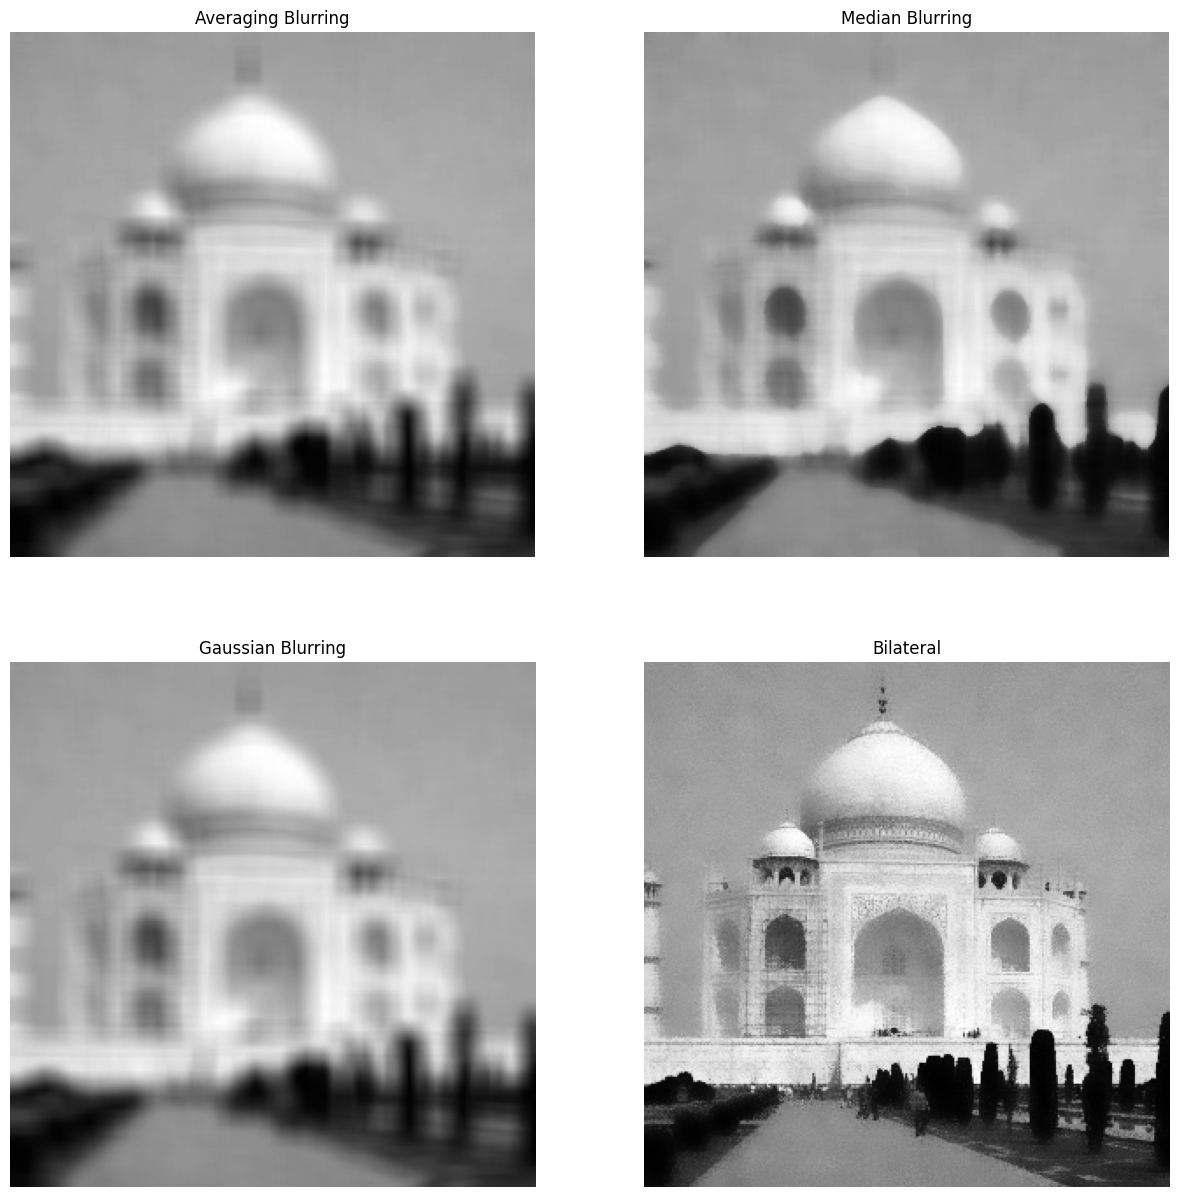

In [ ]:
# Do not change this cell
Array = [AveragingBlurring, MedianBlurring, GaussianBlurring, Bilateral]
titles = ['Averaging Blurring', 'Median Blurring', 'Gaussian Blurring', 'Bilateral']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")